# Muhammad Qasim

## Project: Finding Donors for CharityML
## Dataset Preview

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# Implementation: Data Exploration

A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than $50,000. In the code cell below, you will need to compute the following:

The total number of records, 'n_records'
The number of individuals making more than $50,000 annually, 'n_greater_50k'.
The number of individuals making at most $50,000 annually, 'n_at_most_50k'.
The percentage of individuals making more than $50,000 annually, 'greater_percent'.

Hint: One may look at the table above to understand how the 'income' entries are formatted.

In [2]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[(data.income == '>50K')].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[(data.income == '<=50K')].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100.0 * n_greater_50k / n_records

# Print the results
print("number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


# Preparing the Data

Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as preprocessing. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: 'capital-gain' and 'capital-loss'.

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

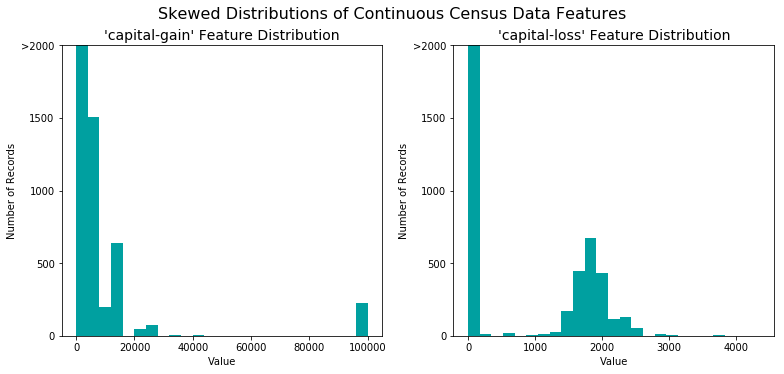

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as 'capital-gain' and 'capital-loss', it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed.

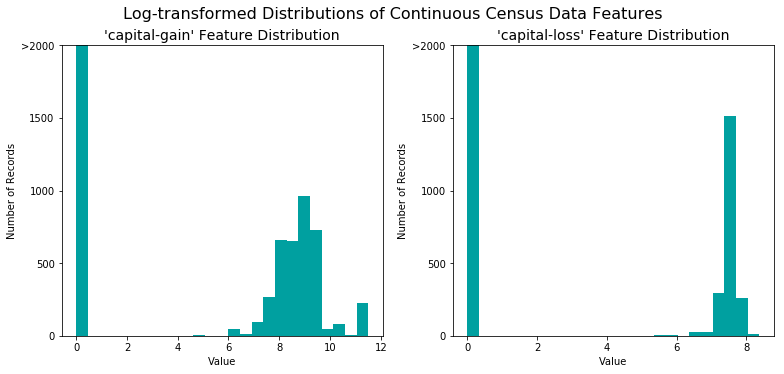

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

# Normalizing Numerical Features

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as 'capital-gain' or 'capital-loss' above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use sklearn.preprocessing.MinMaxScaler for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(features_raw[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 2))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.8,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States


# Implementation: Data Preprocessing

From the table in Exploring the Data above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. For example, assume someFeature has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.

someFeature		someFeature_A	someFeature_B	someFeature_C
0	B		0	1	0
1	C	----> one-hot encode ---->	0	0	1
2	A		1	0	0
Additionally, as with the non-numeric features, we need to convert the non-numeric target label, 'income' to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as 0 and 1, respectively. In code cell below, you will need to implement the following:

Use pandas.get_dummies() to perform one-hot encoding on the 'features_raw' data.
Convert the target label 'income_raw' to numerical entries.
Set records with "<=50K" to 0 and records with ">50K" to 1.

In [6]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print( encoded[:10])

print( "\nAfter converting income_raw to numerical type")
display(income.head(5))

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc']

After converting income_raw to numerical type


0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

# Shuffle and Split Data

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [7]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Train set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Train set has 36177 samples.
Testing set has 9045 samples.


D:\Anaconda22\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Run classifiers with bagging and boosting techniques with default settings and random state being similar. Mention highest accuracy achieved. Techniques should include Random forest, gradient boosting and Adaptive boosting.

In [11]:
#RANDOM FOREST
#Import Library
from sklearn.ensemble import RandomForestClassifier #use RandomForestRegressor for regression problem
from sklearn.metrics import fbeta_score, accuracy_score
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
X=features
y=income
# Create Random Forest object
model= RandomForestClassifier()
# Train the model using the training sets and check score
model.fit(X, y)
#Predict Output
predicted= model.predict(X_test)
model_accuracy = accuracy_score(y_test, predicted)
print("Random Forest Model accuracy:", model_accuracy)

('Random Forest Model accuracy:', 0.9598673300165838)


In [12]:
#GRADIENT BOOSTING
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier().fit(X_train, y_train)
# show scores
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)
print( "Gradient Boosting Model accuracy:", model_accuracy)

('Gradient Boosting Model accuracy:', 0.8630182421227197)


In [37]:
#ADAPTIVE BOOSTING
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set 
model = AdaBoostClassifier().fit(X_train, y_train)

# show scores
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)
print( "Adaptive boost Model accuracy:", model_accuracy)

('Adaptive boost Model accuracy:', 0.8576008844665561)


## Highest Accuracy = Random Forest Model accuracy: 0.9621890547263682

In [1]:
#RANDOM FOREST for 1000 trees
# Create Random Forest object
model= RandomForestClassifier(n_estimators=100)
# Train the model using the training sets and check score
model.fit(X, y)
#Predict Output
predicted= model.predict(X_test)
model_accuracy = accuracy_score(y_test, predicted)
print("\nRandom Forest Model accuracy for 1000 Trees:", model_accuracy)

NameError: name 'RandomForestClassifier' is not defined

In [17]:
#ADAPTIVE BOOSTING WITH PARAMETERS
model = AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=0).fit(X_train, y_train)

# show scores
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)
print( "Adaptive boost Model accuracy by increasing n_estimators:", model_accuracy)

('Adaptive boost Model accuracy by increasing n_estimators:', 0.8605859590934217)


In [19]:
#ADAPTIVE BOOSTING WITH PARAMETERS
model = AdaBoostClassifier(n_estimators=50,learning_rate=2,random_state=0).fit(X_train, y_train)

# show scores
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)
print( "Adaptive boost Model accuracy by increasing learning_rate:", model_accuracy)

('Adaptive boost Model accuracy by increasing learning_rate:', 0.24378109452736318)


In [20]:
#ADAPTIVE BOOSTING WITH PARAMETERS
model = AdaBoostClassifier(n_estimators=50,learning_rate=2,random_state=1).fit(X_train, y_train)

# show scores
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)
print( "Adaptive boost Model accuracy by increasing random state:", model_accuracy)

('Adaptive boost Model accuracy by increasing random state:', 0.24378109452736318)


In [21]:
#GRADIENT BOOSTING
# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier(n_estimators=100,learning_rate=1,random_state=0).fit(X_train, y_train)
# show scores
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)
print( "Gradient Boosting Model accuracy by increasing n_estimators:", model_accuracy)

('Gradient Boosting Model accuracy by increasing n_estimators:', 0.8677722498618021)


In [22]:
#GRADIENT BOOSTING
# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier(n_estimators=50,learning_rate=2,random_state=0).fit(X_train, y_train)
# show scores
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)
print( "Gradient Boosting Model accuracy by increasing learning_rate:", model_accuracy)

('Gradient Boosting Model accuracy by increasing learning_rate:', 0.5850746268656717)


In [23]:
#GRADIENT BOOSTING
# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier(n_estimators=50,learning_rate=1,random_state=1).fit(X_train, y_train)
# show scores
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)
print( "Gradient Boosting Model accuracy by increasing random state:", model_accuracy)

('Gradient Boosting Model accuracy by increasing random state:', 0.8678828081813157)


## Visualize variance and bias

In [24]:
import time
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <!-- collapse=True -->

X = X_train
y= y_train


# Modified from http://scikit-learn.org/stable/auto_examples/plot_learning_curve.html
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)

D:\Anaconda22\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


D:\Anaconda22\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


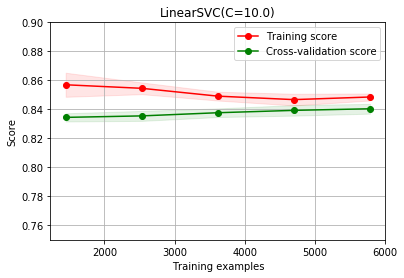

In [25]:
from sklearn.svm import LinearSVC
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, y, ylim=(0.75, 0.9),
                    train_sizes=np.linspace(.05, 0.2, 5))

In [26]:
import time
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <!-- collapse=True -->

X = X_test
y= y_test


# Modified from http://scikit-learn.org/stable/auto_examples/plot_learning_curve.html
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Testing score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Testing examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)

## Example of Variance and bias

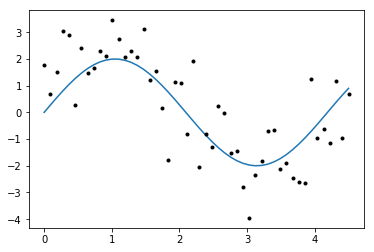

In [27]:
import numpy as np
import pylab as pl

def f(size):
    '''
    Returns a sample with 'size' instances without noise.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    Returns a sample with 'size' instances.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + pl.randn(x.size)
    return (x,y)
    
pl.clf()
f_x, f_y = f(50)
pl.plot(f_x, f_y)
x, y = sample(50)
pl.plot(x, y, 'k.')

# Model fitting

In [28]:
# This illustrates how vander function works:
x1 = np.array([1,2,3])
print( np.vander(x1, 4))

[[ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]]


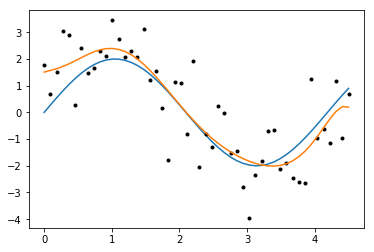

In [29]:
from sklearn.linear_model import LinearRegression

def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

model = fit_polynomial(x, y, 8)
p_y = apply_polynomial(model, x)
pl.plot(f_x, f_y)
pl.plot(x, y, 'k.')
pl.plot(x, p_y)

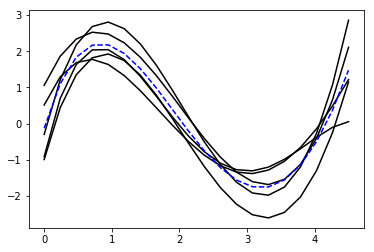

In [30]:
degree = 4
n_samples = 20
n_models = 5
avg_y = np.zeros(n_samples)
for i in range(n_models):
    (x,y) = sample(n_samples)
    model = fit_polynomial(x, y, degree)
    p_y = apply_polynomial(model, x)
    avg_y = avg_y + p_y
    pl.plot(x, p_y, 'k-')
avg_y = avg_y / n_models
pl.plot(x, avg_y, 'b--')

## Calculating bias and variance

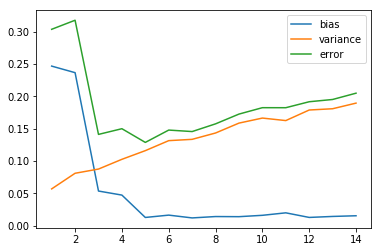

In [31]:
from numpy.linalg import norm
n_samples = 20
f_x, f_y = f(n_samples)
n_models = 100
max_degree = 15
var_vals =[]
bias_vals = []
error_vals = []
for degree in range(1, max_degree):
    avg_y = np.zeros(n_samples)
    models = []
    for i in range(n_models):
        (x,y) = sample(n_samples)
        model = fit_polynomial(x, y, degree)
        p_y = apply_polynomial(model, x)
        avg_y = avg_y + p_y
        models.append(p_y)
    avg_y = avg_y / n_models
    bias_2 = norm(avg_y - f_y)/f_y.size
    bias_vals.append(bias_2)
    variance = 0
    for p_y in models:
        variance += norm(avg_y - p_y)
    variance /= f_y.size * n_models
    var_vals.append(variance)
    error_vals.append(variance + bias_2)
pl.plot(range(1, max_degree), bias_vals, label='bias')
pl.plot(range(1, max_degree), var_vals, label='variance')
pl.plot(range(1, max_degree), error_vals, label='error')
pl.legend()

## Cross Validation

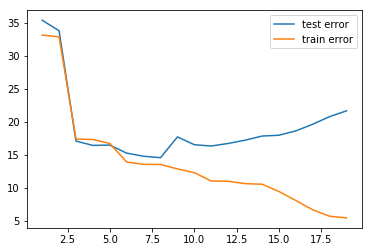

In [32]:
n_samples = 20
# train sample
train_x, train_y = sample(n_samples)
# validation sample
test_x, test_y = sample(n_samples)
max_degree = 20
test_error_vals = []
train_error_vals = []
for degree in range(1, max_degree):
    model = fit_polynomial(train_x, train_y, degree)
    p_y = apply_polynomial(model, train_x)
    train_error_vals.append(pl.norm(train_y - p_y)**2)
    p_y = apply_polynomial(model, test_x)
    test_error_vals.append(pl.norm(test_y - p_y)**2)
pl.plot(range(1, max_degree), test_error_vals, label='test error')
pl.plot(range(1, max_degree), train_error_vals, label='train error')
pl.legend()

## Regularization

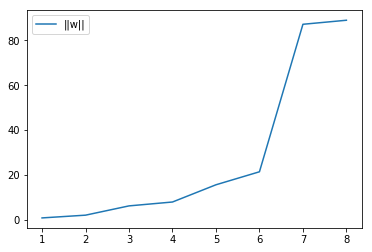

In [33]:
n_samples = 20
train_x, train_y = sample(n_samples)
max_degree = 9
w_norm = []
for degree in range(1, max_degree):
    model = fit_polynomial(train_x, train_y, degree)
    w_norm.append(pl.norm(model.coef_))
pl.plot(range(1, max_degree), w_norm, label='||w||')
pl.legend()